**Iris dataset**

In [ ]:
import pandas as pd

In [ ]:
df_iris = pd.read_csv('/content/sample_data/iris (1).csv')
display(df_iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print("Shape of the DataFrame:", df_iris.shape)

print("\nData Types:\n", df_iris.dtypes)

print("\nDescriptive Statistics:\n", df_iris.describe())

print("\nMissing Values:\n", df_iris.isnull().sum())

print("\nTarget Variable Distribution:\n", df_iris['species'].value_counts())



Shape of the DataFrame: (150, 5)

Data Types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Descriptive Statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Target Variable Distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [ ]:
X = df_iris.drop('species', axis=1)

y = df_iris['species']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = {}

for k in range(1, 31):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)

    training_accuracy[k] = knn_classifier.score(X_train, y_train)

best_k = max(training_accuracy, key=training_accuracy.get)

print(f"Optimal k value (based on training accuracy): {best_k}")

best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

Optimal k value (based on training accuracy): 1


KNeighborsClassifier(n_neighbors=1)

In [ ]:
accuracy = best_knn_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


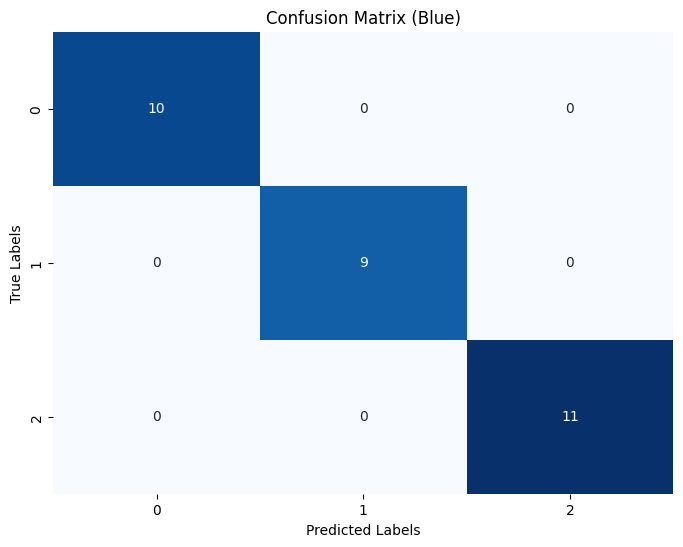

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = best_knn_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Blue)")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print(report_df)

              precision  recall  f1-score  support
setosa              1.0     1.0       1.0     10.0
versicolor          1.0     1.0       1.0      9.0
virginica           1.0     1.0       1.0     11.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     30.0
weighted avg        1.0     1.0       1.0     30.0


**Diabeties Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/diabetes.csv')
display(df.head())
print(df.shape)
df.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Shape of the DataFrame: (768, 9)

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000

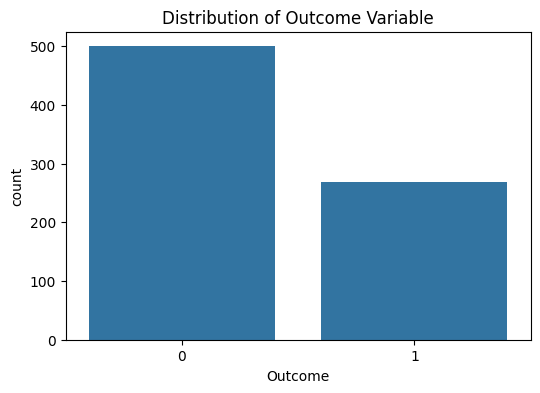

In [ ]:
import matplotlib.pyplot as plt

print("Shape of the DataFrame:", df.shape)

print("\nData Types:\n", df.dtypes)

print("\nDescriptive Statistics:\n", df.describe())

print("\nMissing Values:\n", df.isnull().sum())

print("\nTarget Variable Distribution:\n", df['Outcome'].value_counts())


plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome Variable')
plt.show()



In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 3, 5, 7, 9, 11]
accuracy_scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[k] = accuracy
    print(f"Accuracy for k={k}: {accuracy}")

best_k = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_k]
print(f"\nBest k: {best_k}, Best Accuracy: {best_accuracy}")

Accuracy for k=1: 0.7077922077922078
Accuracy for k=3: 0.6948051948051948
Accuracy for k=5: 0.7012987012987013
Accuracy for k=7: 0.7467532467532467
Accuracy for k=9: 0.7337662337662337
Accuracy for k=11: 0.7207792207792207

Best k: 7, Best Accuracy: 0.7467532467532467


In [ ]:
print(f"Accuracy: {best_accuracy}")

Accuracy: 0.7467532467532467


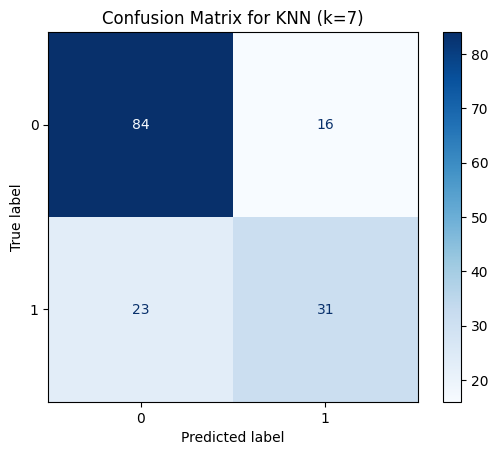

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_k = 7
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for KNN (k={best_k})")
plt.show()

**Heart Dataset**

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/sample_data/heart.csv')
display(df2.head())
print(df2.shape)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


(303, 14)


In [ ]:
print("Shape of the DataFrame:", df2.shape)

print("\nData Types:\n", df2.dtypes)

print("\nDescriptive Statistics:\n", df2.describe())

print("\nMissing Values:\n", df2.isnull().sum())

print("\nTarget Variable Distribution:\n", df2['target'].value_counts())



Shape of the DataFrame: (303, 14)

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Descriptive Statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def cap_outliers(df2, column, lower_percentile=1, upper_percentile=99):
    lower_bound = df2[column].quantile(lower_percentile / 100)
    upper_bound = df2[column].quantile(upper_percentile / 100)
    df2[column] = df2[column].clip(lower=lower_bound, upper=upper_bound)
    return df2

df2 = cap_outliers(df2, 'chol')
df2 = cap_outliers(df2, 'trestbps')

numerical_cols = df2.select_dtypes(include=['number']).drop('target', axis=1).columns
scaler = StandardScaler()

X = df2.drop('target', axis=1)
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242, 13)
y_train shape: (242,)
X_test shape: (61, 13)
y_test shape: (61,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1, 21))
knn_models = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_models[k] = knn

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}
for k, model in knn_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[k] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
    print(f"k = {k}: accuracy={accuracy:.4f}, precision={precision:.4f}, recall={recall:.4f}, f1={f1:.4f}")

best_k = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest k value: {best_k}")
print(f"Metrics for best k: {results[best_k]}")

k = 1: accuracy=0.7377, precision=0.7373, recall=0.7377, f1=0.7367
k = 2: accuracy=0.7213, precision=0.7386, recall=0.7213, f1=0.7203
k = 3: accuracy=0.8033, precision=0.8222, recall=0.8033, f1=0.7975
k = 4: accuracy=0.7869, precision=0.7878, recall=0.7869, f1=0.7871
k = 5: accuracy=0.8197, precision=0.8262, recall=0.8197, f1=0.8172
k = 6: accuracy=0.8361, precision=0.8366, recall=0.8361, f1=0.8354
k = 7: accuracy=0.8197, precision=0.8262, recall=0.8197, f1=0.8172
k = 8: accuracy=0.8361, precision=0.8403, recall=0.8361, f1=0.8344
k = 9: accuracy=0.8197, precision=0.8262, recall=0.8197, f1=0.8172
k = 10: accuracy=0.8033, precision=0.8065, recall=0.8033, f1=0.8013
k = 11: accuracy=0.8197, precision=0.8346, recall=0.8197, f1=0.8154
k = 12: accuracy=0.8525, precision=0.8604, recall=0.8525, f1=0.8504
k = 13: accuracy=0.8361, precision=0.8473, recall=0.8361, f1=0.8331
k = 14: accuracy=0.8361, precision=0.8473, recall=0.8361, f1=0.8331
k = 15: accuracy=0.8033, precision=0.8222, recall=0.8033,

In [ ]:
print(f"accuracy={results[best_k]['accuracy']}")

accuracy=0.8524590163934426


Text(0, 0.5, 'Accuracy')

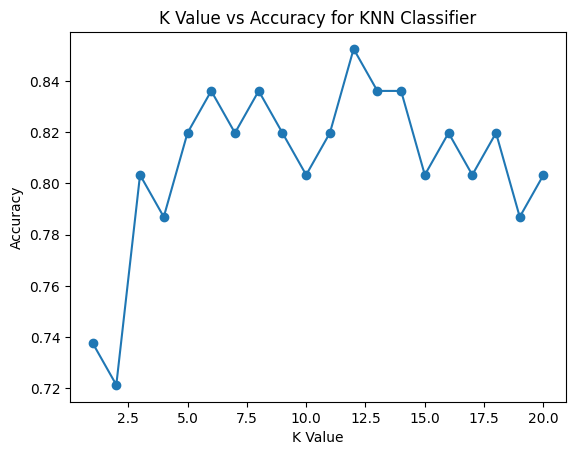

In [ ]:
import matplotlib.pyplot as plt

k_values = list(results.keys())
accuracy_scores = [results[k]['accuracy'] for k in k_values]

plt.plot(k_values, accuracy_scores, marker='o')
plt.title('K Value vs Accuracy for KNN Classifier')
plt.xlabel('K Value')
plt.ylabel('Accuracy')


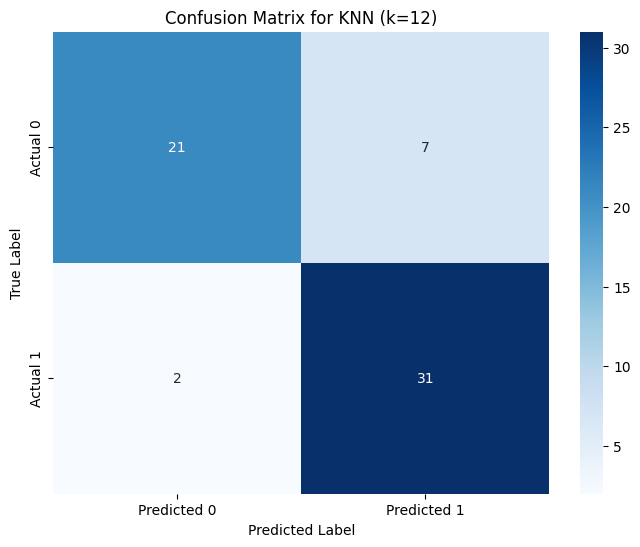

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.82      0.94      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = knn_models[12].predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for KNN (k=12)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Classification Report:\n", cr)